# Open Science Survey: Bionanoscience Department (BN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
from itertools import chain, zip_longest

## Introduction
Open Science is a term that is increasingly more used and applied in research practices. Open Science practices are also increasingly required by research funders. To learn more about what BN employees think about Open Science and to better understand the support required at their department, the Open Science Team conducted a survey on the topic, available from 03/11/2022 to 02/12/2022.

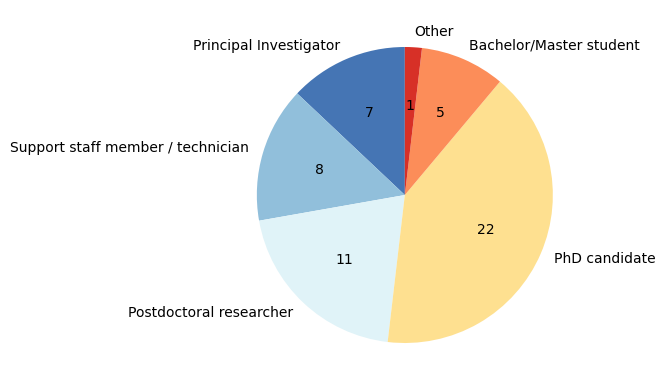

In [2]:
# Load data from excel file as data frame
survey_all = pd.read_excel("Open_Science_Survey_BN_cln.xlsx")

# Count answers / position
positions = [
    "Principal Investigator",
    "Support staff member / technician",
    "Postdoctoral researcher",
    "PhD candidate",
    "Bachelor/Master student",
    "Other",
]
counts = np.zeros(len(positions))
for ind, position in enumerate(positions[:-1]):
    counts[ind] = sum(survey_all["Position:"] == position)
counts[-1] = len(survey_all.index) - sum(counts[:-1])  # "Other" category

colors = [
    (69 / 255, 117 / 255, 180 / 255),
    (145 / 255, 191 / 255, 219 / 255),
    (224 / 255, 243 / 255, 248 / 255),
    (254 / 255, 224 / 255, 144 / 255),
    (252 / 255, 141 / 255, 89 / 255),
    (215 / 255, 48 / 255, 39 / 255),
]


# Get integer values back for pie chart below
def func(pct, allvals):
    absolute = int(np.round(pct / 100.0 * np.sum(allvals)))
    return f"{absolute}"


# Plot pie chart
fig, ax = plt.subplots(figsize=(7, 4))
ax.pie(
    counts,
    labels=positions,
    autopct=lambda pct: func(pct, counts),
    colors=colors,
    startangle=90,
)
fig.tight_layout()

# Define main outpath and save figure
folders = [
    "principal_investigator",
    "support_staff",
    "postdoc",
    "PhD_candidate",
    "bep_mep_student",
    "other",
]
main_outpath = Path("plot_results_BN")
main_outpath.mkdir(exist_ok=True)
fig.savefig(main_outpath / "participants.pdf", bbox_inches="tight")

In the following, the results will be displayed for a selected professional position:\
\
(0) All positions\
(1) Principal Investigator\
(2) Support staff member / technician\
(3) Postdoctoral researcher\
(4) PhD candidate\
(5) Bachelor/Master student\
(6) Other\
\
Please type your choice into the variable `selection` below and hit the "Restart Kernel and Run All Cells..." icon above to update the displayed results to your selection.\
Re-running the notebook will automatically save the newly generated figures in a folder corresponding to the choice.

In [3]:
selection = 0

In [4]:
# Consider choice
if selection in range(0, len(positions) + 1):
    if selection == 0:
        position = "all positions"
        folder = "all_positions"
    else:
        position = positions[selection - 1]
        folder = folders[selection - 1]
    print(f"Currently displayed results for: {position}")
else:
    selection = 0
    position = "all positions"
    folder = "all_positions"
    print('Invalid selection. Selection set to 0 ("All positions").')

# Take only selected survey results and provide some info
if selection in range(1, 6):
    survey = survey_all[survey_all["Position:"] == position]
elif selection == 6:  # other -> free entry, not pre-defined
    pattern = "|".join(positions[0:6])
    survey = survey_all.loc[~survey_all["Position:"].str.contains(pattern, case=False)]
else:  # 0 (either by selection or by default)
    survey = survey_all

# Re-index if survey is a subset of survey_all
if selection in range(1, 7):
    idx = pd.Index(range(0, survey.shape[0], 1))
    survey = survey.set_index(idx)

print(
    f"Total number displayed results: {survey.shape[0]} (from a total of {survey_all.shape[0]})"
)

# Create outpath for auto-saving images
outpath = main_outpath / f"{folder}"
os.makedirs(outpath, exist_ok=True)

Currently displayed results for: all positions
Total number displayed results: 54 (from a total of 54)


## Experience levels

,Have experience,Aware,Unaware,Not interested
Categories,,,,
Open Access,35,19,0,0
Preprints,31,19,3,1
Open Software,27,25,2,0
Open Data,20,31,3,0
Science Communication/Public engagement,19,30,4,0
Open Education,12,28,14,0
Open Methods,12,29,13,0
Open Peer Review,7,35,11,1
Open Hardware,6,22,25,1


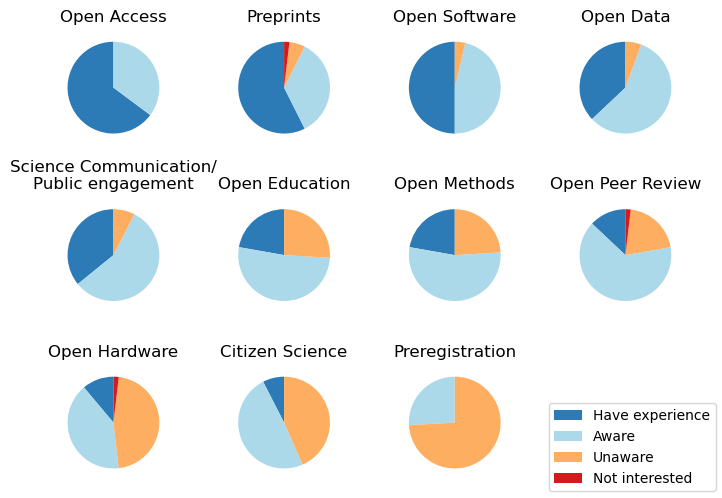

In [5]:
# Extract data for experience level
options01 = ["Have experience", "Aware", "Unaware", "Not interested"]
list01 = list(
    survey.iloc[:, 2:13].columns
)  # from "Open Access" to "Science Communication ..."

# Quantify
counts01 = np.zeros([11, 4])
for indy, topic in enumerate(list01):
    for indx, entry in enumerate(options01):
        counts01[indy, indx] = sum(survey[topic] == entry)
# Plot array of pie charts
fig01, axs01 = plt.subplots(3, 4, figsize=(7, 5))

# Reorder according to count of "Have experience"
idx_sorted = np.flip(np.argsort(counts01[:, 0]))
counts01 = counts01[idx_sorted]
list01 = list(np.array(list01)[idx_sorted])

# Print pretty dataframe (counts)
df01 = pd.DataFrame(np.int32(counts01), columns=options01)
df01["Categories"] = list01
df01 = df01.set_index("Categories")
display(df01)

# Define plot colors
colors01 = [
    (44 / 255, 123 / 255, 182 / 255),
    (171 / 255, 217 / 255, 233 / 255),
    (253 / 255, 174 / 255, 97 / 255),
    (215 / 255, 25 / 255, 28 / 255),
]

# Cosmetics
list01[
    list01.index("Science Communication/Public engagement")
] = "Science Communication/\nPublic engagement"  # add linebreaks

# Arange subplots
for topic, counts, ax in zip_longest(list01, counts01, axs01.ravel()):
    if topic is not None:
        ax.pie(counts, startangle=90, colors=colors01)
        ax.set_title(topic)
    else:
        ax.remove()
fig01.legend(options01, loc="lower right")
fig01.tight_layout()

# Save to correct folder
fig01.savefig(outpath / "experience.pdf", bbox_inches="tight")

## Barriers, training and awareness

In [6]:
def quantify_tick_list_answers(column):
    """
    Takes one dataframe column and quantifies occurences of ticked answers.
    Plots answers in horizontal bar plot.
    """
    # Get question (title)
    question = column.columns[0]
    # Drop lines with empty rows (if they exist)
    if column[question].isnull().values.any():
        column.dropna(subset=[question], inplace=True)
    # Convert df column to nested list
    answers_nested = (column).values.tolist()
    # Unnest list, then join all ticked answers into large string
    answers_str = "".join(list(chain(*answers_nested)))
    # Split after every ;
    answers = list(answers_str.split(";"))
    # Remove emptry strings
    while "" in answers:
        answers.remove("")
    # Get unique sub-strings and count their occurence
    options, counts = np.unique(answers, return_counts=True)

    # Sort by counts and re-order
    idx_sorted = np.argsort(counts)
    options = options[idx_sorted]
    counts = counts[idx_sorted]

    # Plot horizontal bar plot
    fig, ax = plt.subplots(figsize=(7, 4))
    ax.barh(options, counts)
    fig.suptitle(question)
    return question, fig, ax

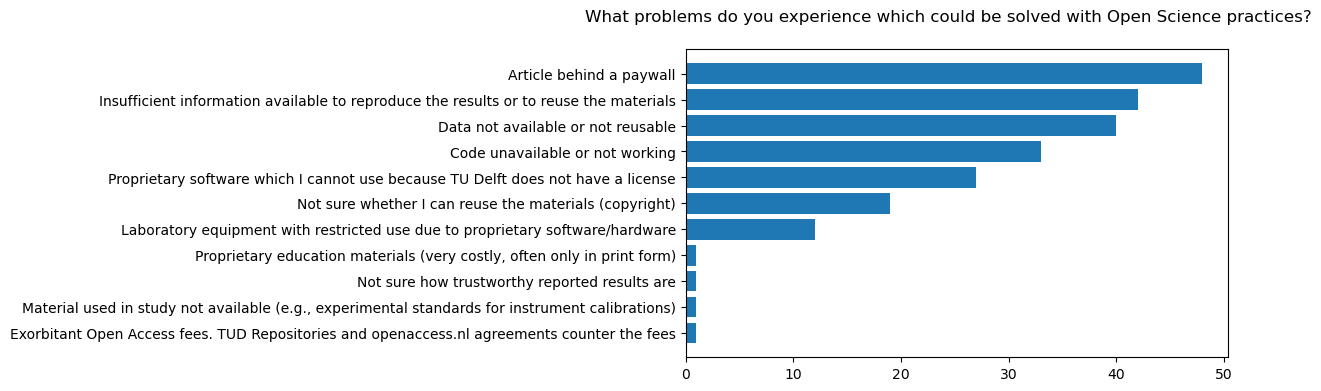

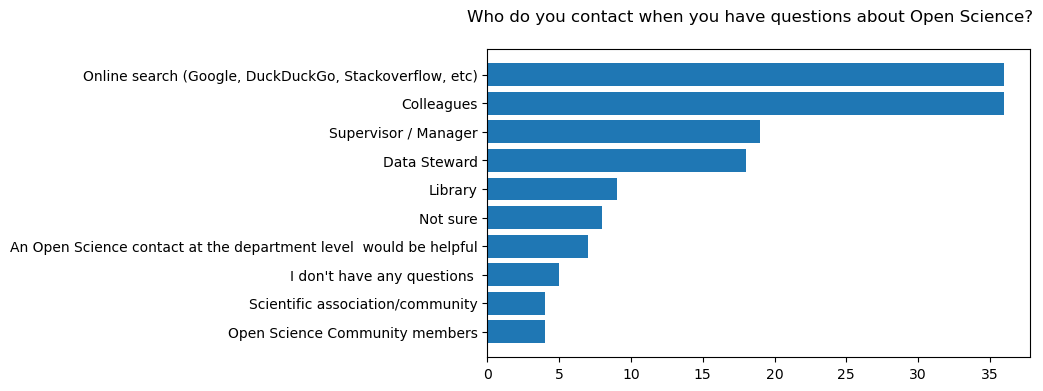

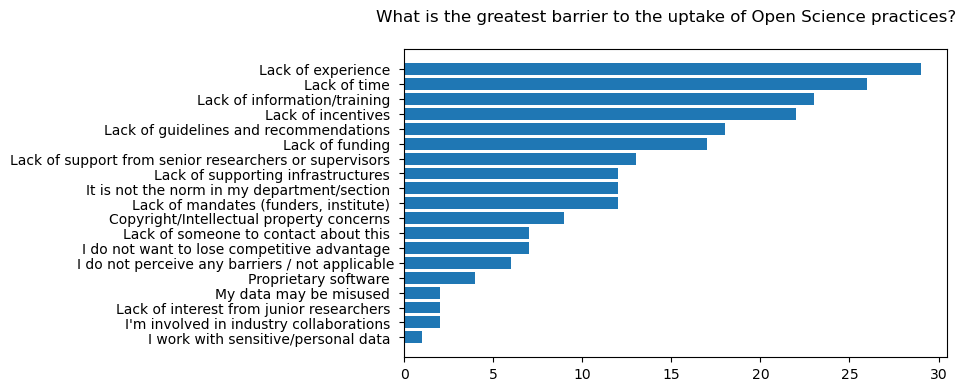

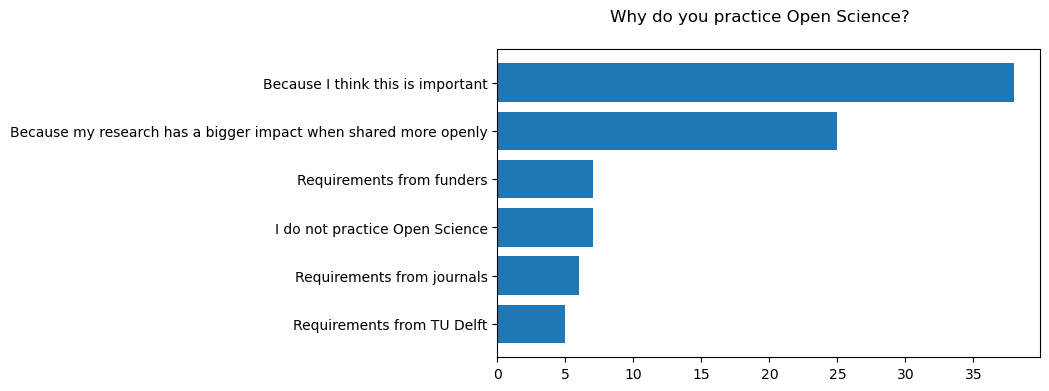

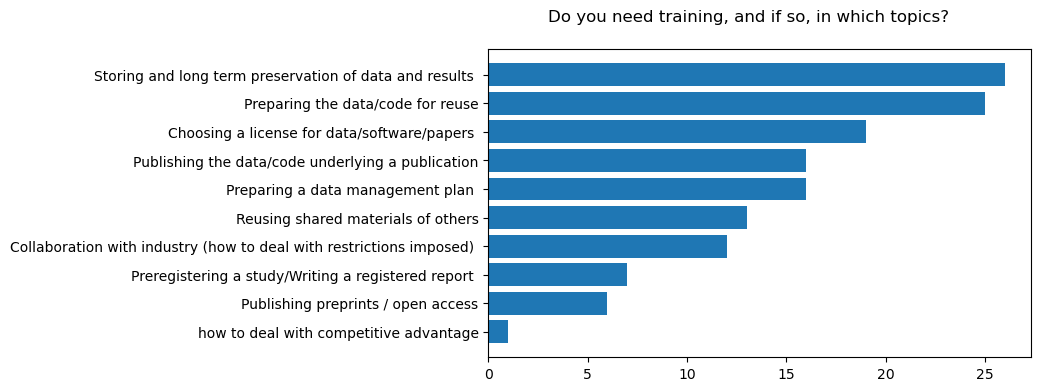

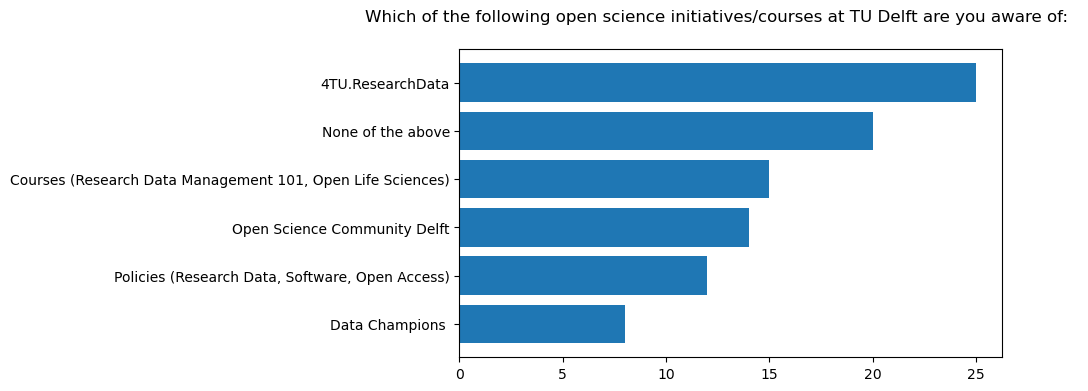

In [7]:
# Get ticked answers for question in column-of-interest

column03 = survey.iloc[:, 13:14]
question03, fig03, ax03 = quantify_tick_list_answers(column03)
fig03.savefig(outpath / "problems.pdf", bbox_inches="tight")

column04 = survey.iloc[:, 15:16]
question04, fig04, ax04 = quantify_tick_list_answers(column04)
fig04.savefig(outpath / "contacts.pdf", bbox_inches="tight")

column05 = survey.iloc[:, 23:24]
question05, fig05, ax05 = quantify_tick_list_answers(column05)
fig05.savefig(outpath / "barriers.pdf", bbox_inches="tight")

column06 = survey.iloc[:, 24:25]
question06, fig06, ax06 = quantify_tick_list_answers(column06)
fig06.savefig(outpath / "reasons.pdf", bbox_inches="tight")

column07 = survey.iloc[:, 25:26]
question07, fig07, ax07 = quantify_tick_list_answers(column07)
fig07.savefig(outpath / "training.pdf", bbox_inches="tight")

column08 = survey.iloc[:, 26:27]
question08, fig08, ax08 = quantify_tick_list_answers(column08)
fig08.savefig(outpath / "awareness.pdf", bbox_inches="tight")

## Ranking

In [8]:
def quantify_ranking_answers(column):
    """
    Takes one dataframe column and quantifies ranked answers.
    Plots answers in stacked bar plot.
    """
    # Preparation
    ## Get question (title)
    question = column.columns[0]
    ## Drop lines with empty rows (if they exist)
    if column[question].isnull().values.any():
        column.dropna(subset=[question], inplace=True)

    # Identify possible answers:
    ## Convert df column to nested list
    answers_nested = (column).values.tolist()  # need only consider first
    ## Unnest list, then join all ticked answers into large string
    answers_str = "".join(list(chain(*answers_nested)))
    ## Split after every ;
    answers = list(answers_str.split(";"))
    ## Remove emptry strings
    while "" in answers:
        answers.remove("")
    ## Get unique sub-strings (topics to rank according to usefulness)
    options = np.unique(answers)

    # Quantify counts / position for every answer
    dim = len(options)
    counts_in_position = np.zeros((dim, dim))

    for ind in column.index:
        ranking_str = (column.values[ind])[0]
        # Split after every ;
        ranking = list(ranking_str.split(";"))
        # Iterate through options (possible answers) and find their positions
        for opt, option in enumerate(options):
            rank = ranking.index(option)
            counts_in_position[opt, rank] = counts_in_position[opt, rank] + 1

    # Reorder according to count of rank 1 (column 0 of counts_in_position)
    idx_sorted = np.argsort(counts_in_position[:, 0])
    counts_in_position = counts_in_position[idx_sorted]
    options = options[idx_sorted]

    # Print pretty dataframe
    rank_list = list()
    for n in range(10):
        rank_list.append(f"rank {n+1}")
    df = pd.DataFrame(np.int32(counts_in_position), columns=rank_list)
    df["Topics"] = options
    df = df.set_index("Topics")
    display(df)

    # Define plot colors (from colorbrewer2.org)
    colors = [
        (215 / 255, 48 / 255, 39 / 255),
        (244 / 255, 109 / 255, 67 / 255),
        (253 / 255, 174 / 255, 97 / 255),
        (254 / 255, 224 / 255, 144 / 255),
        (255 / 255, 255 / 255, 191 / 255),
        (224 / 255, 243 / 255, 248 / 255),
        (171 / 255, 217 / 255, 233 / 255),
        (116 / 255, 173 / 255, 209 / 255),
        (69 / 255, 117 / 255, 180 / 255),
        (33 / 255, 65 / 255, 145 / 255),
    ]

    # Create stacked bar plot
    fig, ax = plt.subplots(figsize=(7, 4))
    fig.suptitle(question)

    ax.barh(range(dim), counts_in_position[:, 0], color=colors[0], label=f"rank 1")
    offset = counts_in_position[:, 0]
    for ind in range(1, dim):
        ax.barh(
            options,
            counts_in_position[:, ind],
            left=offset,
            color=colors[ind],
            label=f"rank {ind+1}",
        )
        offset = offset + counts_in_position[:, ind]

    fig.legend(bbox_to_anchor=(0.9, 0.5), loc="center left")
    return question, fig, ax

,rank 1,rank 2,rank 3,rank 4,rank 5,rank 6,rank 7,rank 8,rank 9,rank 10
Topics,,,,,,,,,,
Citizen Science,0,0,0,0,1,1,2,4,19,26
Open Hardware,0,0,6,4,9,8,14,5,5,2
Open Peer review,0,2,5,7,6,6,4,18,5,0
Preregistration,0,2,1,2,1,1,11,16,11,8
Open Education,1,5,1,4,2,17,12,7,3,1
Open Methods,2,6,15,8,14,6,0,1,1,0
Open Data,3,15,8,12,10,4,0,0,1,0
Open Software,4,14,11,11,6,4,2,0,0,1
Science Communication / Public Engagement,5,3,0,4,4,4,8,2,8,15


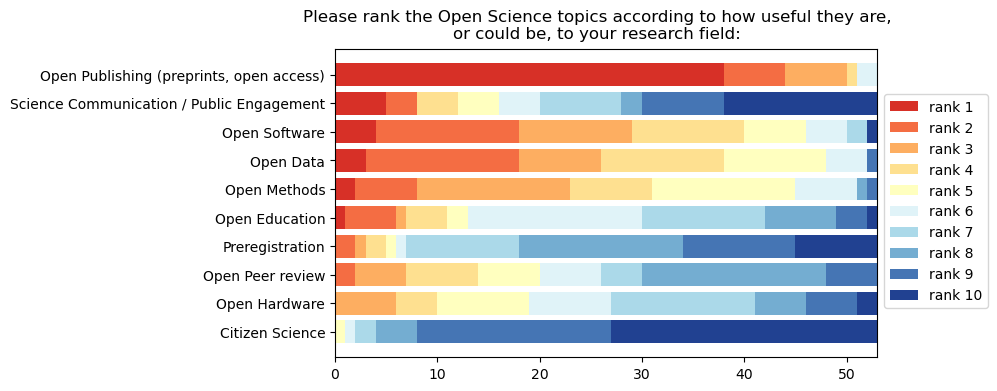

In [9]:
# Evalute ranking data

column10 = survey.iloc[:, 14:15]
question10, fig10, ax10 = quantify_ranking_answers(column10)
fig10.suptitle(
    "Please rank the Open Science topics according to how useful they are,\nor could be, to your research field:"
)  # add linebreaks
fig10.savefig(outpath / "ranking.pdf", bbox_inches="tight")

## Challenge levels

,Not challenging,Somewhat challenging,Neutral,Challenging,Very Challenging
Categories,,,,,
Publishing a preprint,29,7,15,1,0
Sharing protocols,18,13,14,7,0
Sharing code,15,14,11,10,2
Publishing Open Access,10,11,18,12,2
Sharing Educational materials,8,12,23,7,1
Sharing data,8,25,12,6,2
Science Communication,5,12,18,16,2


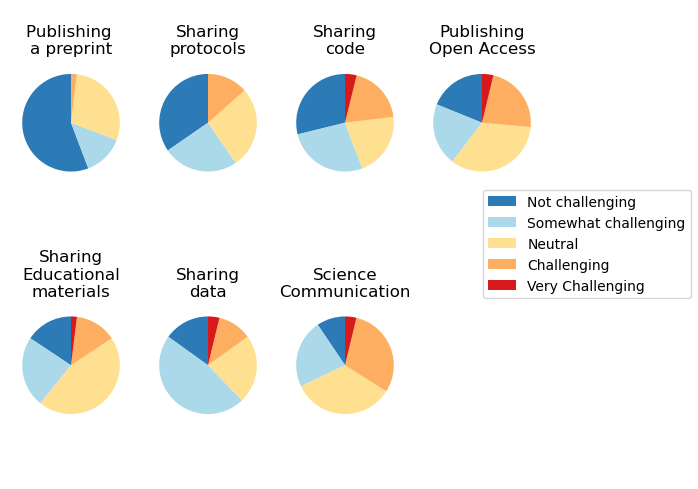

In [10]:
# Extract data for challenging / not challenging
options02 = [
    "Not challenging",
    "Somewhat challenging",
    "Neutral",
    "Challenging",
    "Very Challenging",
]
list02 = list(
    survey.iloc[:, 16:23].columns
)  # from "Publishing a preprint" to "Science Communication"

# Quantify
counts02 = np.zeros([7, 5])
for indy, topic in enumerate(list02):
    for indx, entry in enumerate(options02):
        counts02[indy, indx] = sum(survey[topic] == entry)

# Reorder according to count of "Not challenging"
idx_sorted = np.flip(np.argsort(counts02[:, 0]))
counts02 = counts02[idx_sorted]
list02 = list(np.array(list02)[idx_sorted])

# Print pretty dataframe (counts)
df02 = pd.DataFrame(np.int32(counts02), columns=options02)
df02["Categories"] = list02
df02 = df02.set_index("Categories")
display(df02)

# Plot array of pie charts
fig02, axs02 = plt.subplots(2, 5, figsize=(7, 5))

# Cosmetics
axs02[-1, -1].axis("off")  # remove empty box
axs02[-1, -2].axis("off")  # remove empty box
axs02[-2, -1].axis("off")  # remove empty box
list02[
    list02.index("Publishing a preprint")
] = "Publishing \na preprint"  # add linebreaks
list02[list02.index("Sharing data")] = "Sharing\ndata"  # add linebreaks
list02[list02.index("Sharing code")] = "Sharing\ncode"  # add linebreaks
list02[list02.index("Sharing protocols")] = "Sharing\nprotocols"  # add linebreaks
list02[
    list02.index("Publishing Open Access")
] = "Publishing\nOpen Access"  # add linebreaks
list02[
    list02.index("Sharing Educational materials")
] = "Sharing\nEducational\nmaterials"  # add linebreaks
list02[
    list02.index("Science Communication")
] = "Science\nCommunication"  # add linebreaks

# Arange subplots
colors02 = [
    (44 / 255, 123 / 255, 182 / 255),
    (171 / 255, 217 / 255, 233 / 255),
    (254 / 255, 224 / 255, 144 / 255),
    (253 / 255, 174 / 255, 97 / 255),
    (215 / 255, 25 / 255, 28 / 255),
]
for ind, topic in enumerate(list02):
    axs02[ind // 4, np.mod(ind, 4)].pie(
        counts02[ind, :], startangle=90, colors=colors02
    )
    axs02[ind // 4, np.mod(ind, 4)].set_title(topic)
fig02.legend(options02, loc="center right")
fig02.tight_layout()

# Save to correct folder
fig02.savefig(outpath / "challenges.pdf", bbox_inches="tight")

## Events

,Interested,Neutral,Not interested
Suggested events:,,,
Annual Open Science event,26,17,11
Open Science Award,16,23,15


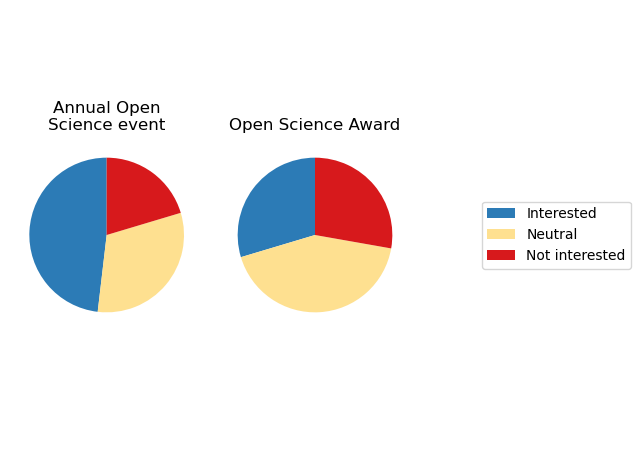

In [11]:
# Extract data for experience level
options09 = ["Interested", "Neutral", "Not interested"]
list09 = list(
    survey.iloc[:, 27:29].columns
)  # from "Annual Open Science event" to "Open Science Award"

# Quantify
counts09 = np.zeros([2, 3])
for indy, topic in enumerate(list09):
    for indx, entry in enumerate(options09):
        counts09[indy, indx] = sum(survey[topic] == entry)

# Print pretty dataframe (counts)
df09 = pd.DataFrame(np.int32(counts09), columns=options09)
df09["Suggested events:"] = list09
df09 = df09.set_index("Suggested events:")
display(df09)

# Plot array of pie charts
fig09, axs09 = plt.subplots(1, 3)

# Cosmetics
axs09[2].axis("off")  # remove empty box
list09[
    list09.index("Annual Open Science event")
] = "Annual Open\nScience event"  # add linebreaks


# Arange subplots
colors09 = [
    (44 / 255, 123 / 255, 182 / 255),
    (254 / 255, 224 / 255, 144 / 255),
    (215 / 255, 25 / 255, 28 / 255),
]
for ind, topic in enumerate(list09):
    axs09[ind].pie(counts09[ind, :], startangle=90, colors=colors09)
    axs09[ind].set_title(topic)
fig09.legend(options09, loc="center right")
fig09.tight_layout()

# Save to correct folder
fig09.savefig(outpath / "events.pdf", bbox_inches="tight")